In [23]:
# # !pip install --upgrade --force-reinstall pandas
# !pip uninstall pandas
# !pip install pandas

In [24]:
import seaborn as sns
# import pandas as pd
import pandas; print(pandas.__version__)


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# For data processing
import numpy as np
import pandas as pd
import scipy.stats as stats

# For API usage
import requests as r

# For progress bar
from tqdm import tqdm

from sklearn.cluster import MiniBatchKMeans
import random






1.5.3


In [25]:
numerical_data = pd.read_csv('cleaned_1015.csv', usecols = ['BUDGET', 'VOTE_AVERAGE'])
top_10 = numerical_data.head(10)



In [26]:

numerical_data.isnull().sum()
numerical_data.info()
numerical_data_top = numerical_data.head(100)









<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6971 entries, 0 to 6970
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VOTE_AVERAGE  6971 non-null   float64
 1   BUDGET        6971 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 109.0 KB


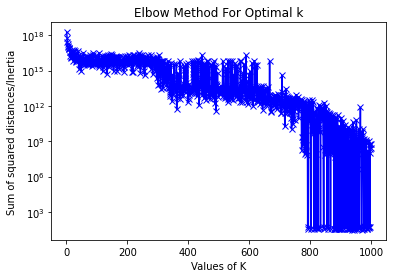

In [27]:

 # randomly sample a smaller subset of data
numerical_data_sample = numerical_data.sample(n= 1000)

#uses mini batch k means: performs better than the standard K-means algorithm while working on huge datasets because it doesn’t iterate over the entire dataset. It creates random batches of data to be stored in memory, then a random batch of data is collected on each iteration to update the clusters.
Sum_of_squared_distances = []
K = range(1, 1001)
for num_clusters in K :
    kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=100)
    kmeans.fit(numerical_data_sample)
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.yscale('log')  # Add this line to scale the y-axis logarithmically
plt.title('Elbow Method For Optimal k')
plt.show()


In [28]:
# Generate sample data
X, y = numerical_data(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Calculate sum of squared distances for different values of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()



TypeError: 'DataFrame' object is not callable